# CS 109A/AC 209A/STAT 121A Data Science: Homework 8
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, November 16th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW8.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [48]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold
from sklearn import svm
from sklearn import discriminant_analysis as da
from sklearn.ensemble import RandomForestClassifier
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Last: Zhang, First: Linying]

### Part (b): Course Number

[AC 209a]

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Processing Revisited

In this problem we revisit applications of classification, with the purpose of comparing the performance of support vector classifiers with other classifiers we have learned. We'll begin with the aeriel vegetation detection problem from Homework #7.

The data is contained in `dataset_1.txt` and `dataset_2.txt` (you are encouraged to use the datasets from Homework #7 as well). The first two columns of the data contains the latitude and longitudes of randomly sampled locations in the satellite image, and the last column contains a label indicating whether the location contains vegetation (1 denotes the presence of vegetation and 0 denotes otherwise). The task is to, again, identify the vegetation regions in the image.

- Compare the result of using support vector classifiers to perform classification against results obtained from other models you have learned. Which model is more appropriate for the general task of vegetation detection in aerial images (do not restrict yourself to which model performs better on just these two datasets)? Which model is more appropriate for other types of image processing (hand-writting digit classification for example) Your comparison should be both **qualitative** and quantitative.

    **Hint:** For your analysis, it's vital to consider the differences between the ways in which each of these models perform classification. These differences can be gauged by looking at the differences between the decision boundaries drawn by the models and **how** these boundaries are determined. 
    
- Are there any obvious draw backs to support vector classifiers as we have presented them to you? What might be some intuitive ways to address these draw backs?

Again, we provide you with a function `plot_decision_boundary` to visualize the decision boundary of a classifier.

In [3]:
#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (classifier)
#      poly_flag (fits quadratic model if true, otherwise linear)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='green')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='white')
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

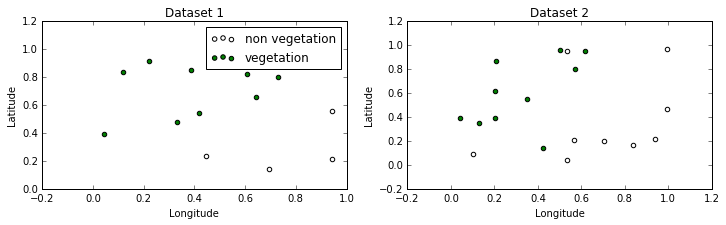

In [4]:
# Load dataset_1
data_1 = pd.read_csv('datasets/dataset_1_train.txt', delimiter=',')

# Load dataset_2
data_2 = pd.read_csv('datasets/dataset_2_train.txt', delimiter=',')

# Plot data
fig, ax = plt.subplots(1, 2, figsize = (12, 3))

#Plot dataset 1

x = data_1.values[:, :-1]
y = data_1.values[:, -1]

ax[0].scatter(x[y==0, 0], x[y==0, 1], c='white', label='non vegetation')
ax[0].scatter(x[y==1, 0], x[y==1, 1], c='green', label='vegetation')

ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Dataset 1')
ax[0].legend(loc='best')

#Plot dataset 2

x = data_2.values[:, :-1]
y = data_2.values[:, -1]

ax[1].scatter(x[y==0, 0], x[y==0, 1], c='white', label='non vegetation')
ax[1].scatter(x[y==1, 0], x[y==1, 1], c='green', label='vegetation')

ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_title('Dataset 2')

plt.show()

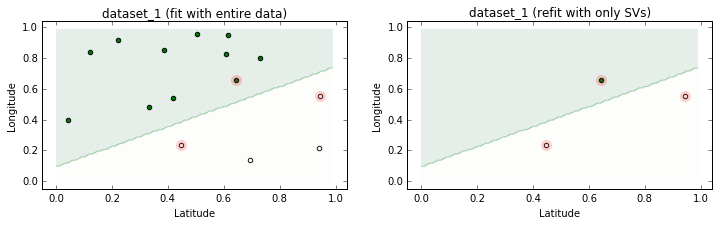

In [5]:
# Load dataset_1
x = data_1.values[:, :-1]
y = data_1.values[:, -1]

# Fit SVM model with C = 1000, linear kernel
model = svm.SVC(C=1000, kernel='linear')
model.fit(x, y)

# Plot decision boundary
fig, ax = plt.subplots(1, 2, figsize = (12, 3))
ax[0] = plot_decision_boundary(x, y, model, 'dataset_1 (fit with entire data)', ax[0])

# Highlight the support vectors
sv_indices = model.support_ # retrieve the support vector indices
ax[0].scatter(x[sv_indices, 0], x[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

# Isolate only support vectors and their labels
x_svs = x[sv_indices, :] 
y_svs = y[sv_indices]
model.fit(x_svs, y_svs)

# Plot decision boundary with only support vectors
ax[1] = plot_decision_boundary(x_svs, y_svs, model, 'dataset_1 (refit with only SVs)', ax[1])

# Highlight the support vectors
ax[1].scatter(x_svs[:, 0], x_svs[:, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

plt.show()

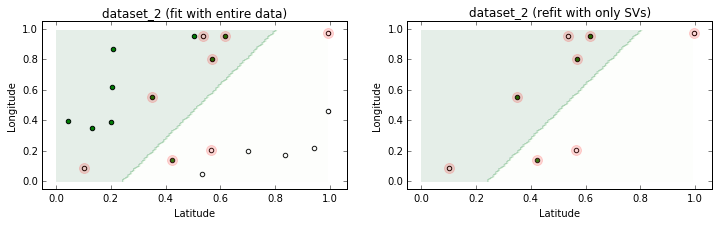

In [6]:
# Load dataset_2
x = data_2.values[:, :-1]
y = data_2.values[:, -1]

# Fit SVM model with C = 1000, linear kernel
model = svm.SVC(C=1000, kernel='linear')
model.fit(x, y)

# Plot decision boundary
fig, ax = plt.subplots(1, 2, figsize = (12, 3))
ax[0] = plot_decision_boundary(x, y, model, 'dataset_2 (fit with entire data)', ax[0])

# Highlight the support vectors
sv_indices = model.support_ # retrieve the support vector indices
ax[0].scatter(x[sv_indices, 0], x[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

# Isolate only support vectors and their labels
x_svs = x[sv_indices, :] 
y_svs = y[sv_indices]
model.fit(x_svs, y_svs)

# Plot decision boundary with only support vectors
ax[1] = plot_decision_boundary(x_svs, y_svs, model, 'dataset_2 (refit with only SVs)', ax[1])

# Highlight the support vectors
ax[1].scatter(x_svs[:, 0], x_svs[:, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

plt.show()

In [18]:
def fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, C, kernel, ax, bounds=(0, 1)):
    # Fit SVM model
    model = svm.SVC(C=C, kernel=kernel)
    model.fit(x_train, y_train)
    
    # Train and test error
    tr_acc = model.score(x_train, y_train)
    ts_acc = model.score(x_test, y_test)

    # Plot decision boundary
    plot_decision_boundary(x_train, y_train, model, \
                           'C = ' + str(C)\
                           + ', train acc = ' + str(tr_acc)\
                           + ', test acc = ' + str(ts_acc), ax, bounds)
    
    # Plot support vectors
    sv_indices = model.support_ # retrieve the support vector indices
    ax.scatter(x_train[sv_indices, 0], x_train[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs
    
    return ax

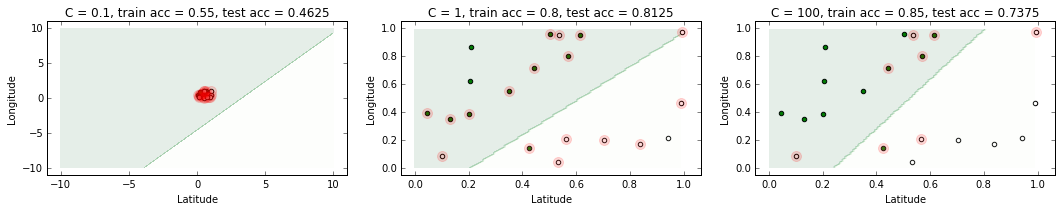

In [19]:
# Load train data
data_train = np.loadtxt("datasets/dataset_2_train.txt", delimiter=',')
x_train = data_train[:, 0:-1]
y_train = data_train[:, -1]

# Load test data
data_test = np.loadtxt("datasets/dataset_2_test.txt", delimiter=',')
x_test = data_test[:, 0:-1]
y_test = data_test[:, -1]

# Fit and plot for different 'C' values
fig, ax = plt.subplots(1, 3, figsize = (15, 3))

ax[0] = fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 0.1, 'linear', ax[0], (-10, 10))

ax[1] = fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 1, 'linear', ax[1])

ax[2] = fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 100, 'linear', ax[2])

plt.tight_layout()

** Analysis:** As C increases, we give more and more weight to accuracy and less emphasize on the margin of separation. So we are expecting the train accuracy to go up, which is proved by the graphs above. But the test accuracy may not necessarily go up with the train.

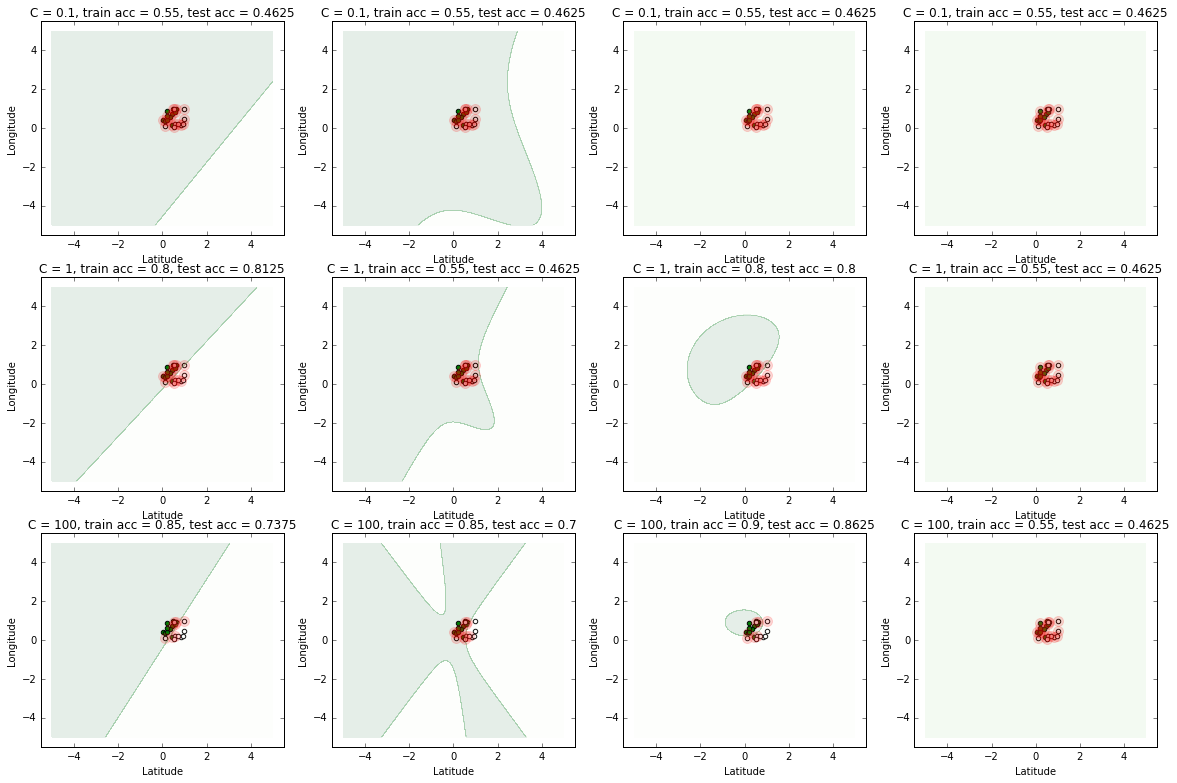

In [56]:
# Try different kernals
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
fig, ax = plt.subplots(3, len(kernel_list), figsize = (20, 13))

# Try parameter C=0.01
graph_ind = 0
for kernel in kernel_list:
    fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 0.1, kernel, ax[0][graph_ind],(-5, 5))
    
    graph_ind +=1

# Try parameter C=1
graph_ind = 0   
for kernel in kernel_list:
    fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 1, kernel, ax[1][graph_ind], (-5, 5))
    
    graph_ind +=1

# Try parameter C=100
graph_ind = 0    
for kernel in kernel_list:
    fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 100, kernel, ax[2][graph_ind], (-5, 5))
    
    graph_ind +=1

**Analysis:** SVM can also fit curved decision boundary by changing the kernel to "poly" or "rbf".

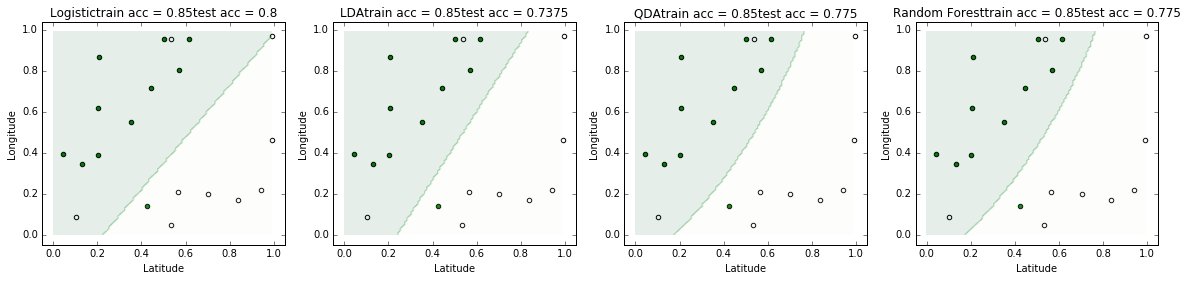

In [55]:
# Try other classification models
# Load train data
data_train = np.loadtxt("datasets/dataset_2_train.txt", delimiter=',')
x_train = data_train[:, 0:-1]
y_train = data_train[:, -1]

# Load test data
data_test = np.loadtxt("datasets/dataset_2_test.txt", delimiter=',')
x_test = data_test[:, 0:-1]
y_test = data_test[:, -1]

mod1 = linear_model.LogisticRegression()
mod2 = da.LinearDiscriminantAnalysis()
mod4 = da.QuadraticDiscriminantAnalysis()
mod5 = RandomForestClassifier()

model_names = ['Logistic', 'LDA', 'QDA', 'Random Forest']
models = np.array([mod1, mod2, mod3, mod4])
fig, ax = plt.subplots(1, 4, figsize = (20, 4))

for i in range(len(models)):
    models[i].fit(x_train, y_train)
    train_score = models[i].score(x_train, y_train)
    test_score = models[i].score(x_test, y_test)
    ax[i] = plot_decision_boundary(x_train, y_train, models[i], 
                               model_names[i] + 'train acc = ' + str(train_score) + 'test acc = ' + str(test_score), 
                               ax[i], (0,1))
    


## Problem 2 (Optional): Classification Competition

This problem will involve an class-wide model building competition, where you will compete with each other in building a prediction model for cancer diagnosis. The results will be displayed live on a public leaderboard. The competition begins on Nov 9th, 3:00pm, and end on Nov 16th, 11:59pm. 

Please access the following link for all relevant details (data set, submission instructions, evaluation metric, leader board, etc.):
https://inclass.kaggle.com/c/harvard-data-science-course-competition

**Reward:** The top 20% of students on the leaderboard will each receive one bonus point to apply to an homework score of their choice (meaning you can turn a homework score of 2 to a 3, 3 to a 4, 5 to a 6 etc).

---

## Challenge Problem: Meta Learning

In the problem, you are provided with 10 different previously trained prediction models for a spam classification task. The task is to investigate how can one combine these models into a single meta classification model (without retraining the individual models) that performs better than each of the individual ones? 

The data for this problem is provided in the files `dataset_5_train.txt` and `dataset_5_test.txt`. Each row of these files is an email described by 57 attributes, and the last column is 1 if the email is spam, and 0 otherwise. 

The prediction models are provided in the file `models.npy` and can be loaded into an array by executing: 

`models = np.load('models.npy')`

As before, you can make predictions using the $i^\text{th}$ using:

`model[i].predict(x_test)` 

and score the model using:

`model[i].score(x_test, y_test)`

The baseline for this task is a simple combination strategy that takes a majority vote from the individual prediction models.

**Any reasonable model that performs better than the baseline model on the test set will receive full credit.**

There are many intuitive ways to combine these 10 models into one; a more sophisticated approach is called "mixture of experts". In this problem, we are not requiring you to implement any particular approach.

In [39]:
# Load the data
train = np.loadtxt('datasets/dataset_5_train.txt', delimiter = ',')
test = np.loadtxt('datasets/dataset_5_test.txt', delimiter = ',')

# Separate predictors and labels
x_train = train[:, :-1]
y_train = train[:, -1]
x_test = test[:, :-1]
y_test = test[:, -1]
y_train.shape

(1514,)

In [40]:
train_df = pd.DataFrame(train)

In [42]:
#Load models
models = np.load('datasets/models.npy')

for i in range(10):
    print models[i].score(x_train, y_train)

<type 'numpy.ndarray'>
0.729194187583
0.667767503303
0.744385733157
0.653896961691
0.509247027741
0.81571994716
0.794583883752
0.610964332893
0.775429326288
0.562087186262


### Method 1 ###

In [14]:
y_pred_majority = np.zeros([len(x_test),])
y_pred_weighted = np.zeros([len(x_test),])

# Predict label of test set using 10 models
for i in range(10):
    # Weight parameter alpha is based on the accuracy of each model on the train set
    alpha = models[i].score(x_train, y_train)

    y_pred = models[i].predict(x_test)
    y_pred[y_pred == 0] = -1
    y_pred_weighted += y_pred*alpha
    y_pred_majority += y_pred
    
# Classify samples based on the sign of the majority vote    
y_pred_majority[y_pred_majority>0] = 1
y_pred_majority[y_pred_majority<0] = 0
y_pred_majority[y_pred_majority==0] = np.random.choice(range(1))
print "The accuracy of majority vote: ", np.mean(y_pred_majority==y_test)

# Classify samples based on the sign of the weighted prediction    
y_pred_weighted[y_pred_weighted>=0] = 1
y_pred_weighted[y_pred_weighted<0] = 0
print "The accuracy of weighted majority vote: ", np.mean(y_pred_weighted==y_test)

The accuracy of majority vote:  0.884353741497
The accuracy of weighted majority vote:  0.882734045999


** Comparison of majority vote and weighted majority vote: ** Unfortunately the accuracy of weighted majority vote is slightly lower than the accuracy of majority vote, so we have to try another way.

### Method 2: ###

Strategy: we first use the 10 models to predict x_train and x_test: for each observation, we get a predicted label from each model, so in total we have 10 predicted labels for each observation. The prediction for x_train forms a n by 10 matrix, which becomes our new_x_train. Similarly for x_test, we have a new_x_test matrix. Then we fit a classification model (ex. svm) using the new_x_train and y_train, and use this model to predict on new_x_test.

In [15]:
new_x_train = np.zeros([len(x_train), len(models)])
new_x_test = np.zeros([len(x_test), len(models)])

# Predict label of test set using 10 models
for i in range(10):

    y_pred = models[i].predict(x_train)
    new_x_train[:, i] = y_pred
    
    y_pred = models[i].predict(x_test)
    new_x_test[:, i] = y_pred


# Fit SVM model with C = 1000

model_svm = svm.SVC(C=1000, kernel='linear')
model_svm.fit(new_x_train, y_train)   
y_pred_svm = model_svm.predict(new_x_test)

print "The accuracy of method 2: ",np.mean(y_pred_svm == y_test)

The accuracy of method 2:  0.89407191448


**Conclusion: ** Method 2 has 89.4% accuracy which is better than baseline 88.4%.

---